In [1]:
from fastai.callbacks.hooks import num_features_model
from fastai.vision import *
import os
data_path = os.path.join(os.getcwd(), "data")

### Reading the data

In [2]:
def get_labels(file): 
    points_df = pd.read_csv(str(file) + ".cat", sep=" ", header=None)
    points = (points_df.values[0][1:-1]).reshape((-1, 2))
    points[:, [0, 1]] = points[:, [1, 0]]
    
    return Tensor(points)

get_labels(os.path.join(data_path, "CAT_00", "00000352_000.jpg"))

tensor([[109., 217.],
        [109., 261.],
        [147., 231.],
        [ 86., 198.],
        [ 32., 187.],
        [ 67., 226.],
        [ 67., 257.],
        [ 28., 283.],
        [ 86., 302.]])

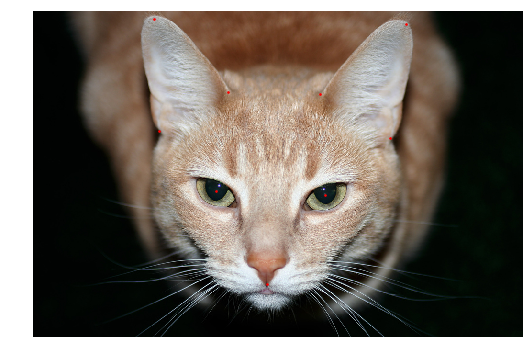

In [3]:
img_path = os.path.join(data_path, "CAT_01", "00000256_006.jpg")
img = open_image(img_path)
points = ImagePoints(FlowField(img.size, get_labels(img_path)))
img.show(y=points, figsize=(9, 6))

In [4]:
np.random.seed(1)
data = (PointsItemList.from_folder(data_path, extensions=".jpg")
        .split_by_valid_func(lambda fname: fname.parent.name=="CAT_06")
       .label_from_func(get_labels) 
       .transform(None, tfm_y=True, size=(224, 224), resize_method=ResizeMethod.SQUISH, 
                    remove_out=False)
       .databunch().normalize(imagenet_stats)
       )

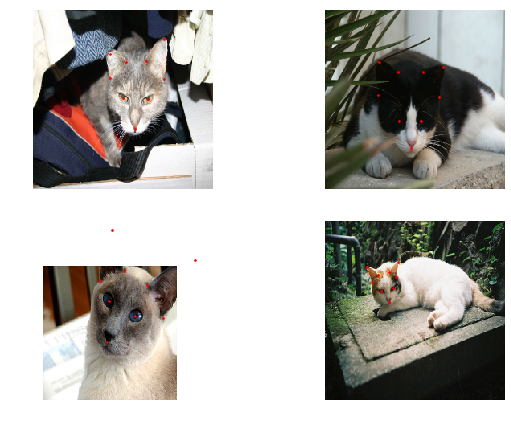

In [5]:
data.show_batch(2, figsize=(9, 6))

In [6]:
len(data.train_ds), len(data.valid_ds)

(8609, 1388)

### Creating the model

In [7]:
learn = cnn_learner(data, models.resnet34)
learn.loss_func = MSELossFlat()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


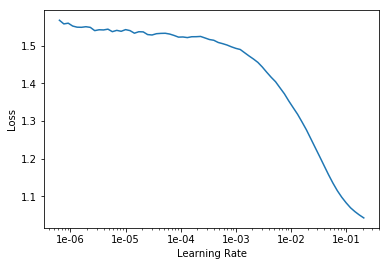

In [8]:
learn.lr_find()
learn.recorder.plot()

In [9]:
learn.fit_one_cycle(30, max_lr=slice(5e-02))

epoch,train_loss,valid_loss,time
0,0.188912,0.065825,00:58
1,0.083864,0.067886,00:51
2,0.067817,0.044969,00:50
3,0.031556,0.019824,00:51
4,0.021225,0.014866,00:50
5,0.021606,0.027835,00:51
6,0.027820,0.524238,00:50
7,0.031127,0.022050,00:50
8,0.025420,0.016446,00:51
9,0.033819,0.031651,00:51


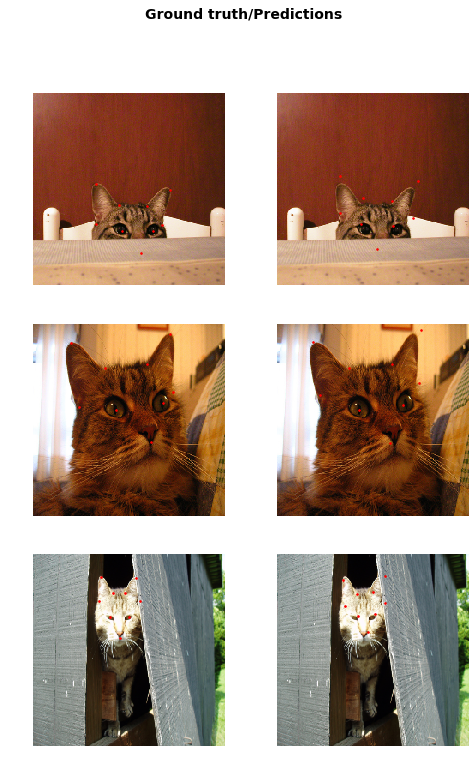

In [10]:
learn.show_results(rows=3)

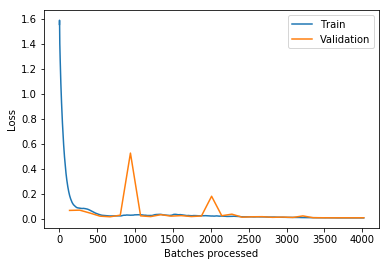

In [11]:
learn.recorder.plot_losses()

In [12]:
learn.save("resnet34-stage1")
#learn.load("resnet34-stage1")

In [13]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


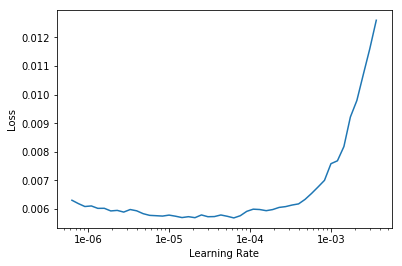

In [14]:
learn.lr_find()
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(15, max_lr=slice(7e-05))

epoch,train_loss,valid_loss,time
0,0.005732,0.006649,00:59
1,0.005795,0.006657,00:58
2,0.005687,0.006425,00:59
3,0.005563,0.006343,00:59
4,0.005483,0.006282,01:00
5,0.005188,0.006067,01:00
6,0.005416,0.006232,00:59
7,0.004905,0.006137,00:59
8,0.004957,0.006115,00:59
9,0.005061,0.006016,00:59


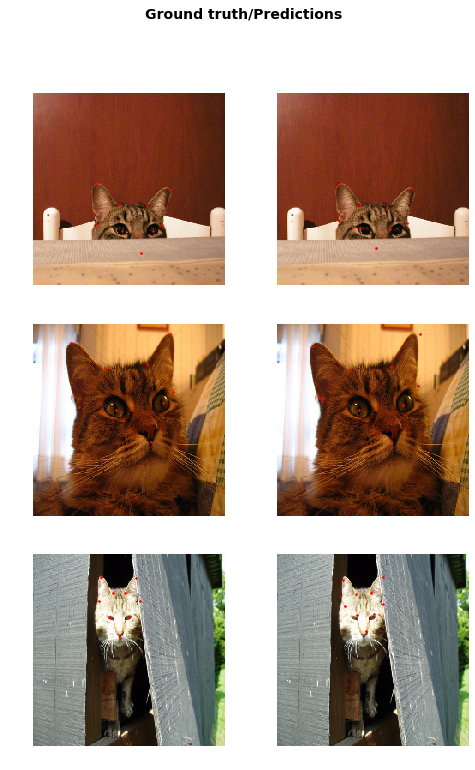

In [16]:
learn.show_results(rows=3)

In [17]:
learn.save("resnet34-stage1")